### convolutions and pooling in code

In [2]:
import tensorflow as tf
from tensorflow import keras
from IPython.display import Image

So here's our code from the earlier example, where we defined out a neural network to have an input layer in the shape of our data, and output layer in the shape of the number of categories we're trying to define, and a hidden layer in the middle. The Flatten takes our square 28 by 28 images and turns them into a one dimensional array.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

To add convolutions to this, you use code like this. You'll see that the last three lines are the same, the Flatten, the Dense hidden layer with 128 neurons, and the Dense output layer with 10 neurons. What's different is what has been added on top of this. Let's take a look at this, line by line.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu',
                          input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

---

In [ ]:
tf.keras.layers.Conv2D(64,(3,3), activation = 'relu', input_shape = (28,28,1))

Here we're specifying the first convolution. We're asking keras to generate 64 filters for us. These filters are 3 by 3, their activation is relu, which means the negative values will be thrown way, and finally the input shape is as before, the 28 by 28. That extra 1 just means that we are tallying using a single byte for color depth. As we saw before our image is our gray scale, so we just use one byte.

Now, of course, you might wonder what the 64 filters are. It's a little beyond the scope of this class to define them, but they aren't random. They start with a set of known good filters in a similar way to the pattern fitting that you saw earlier, and the ones that work from that set are learned over time.

---

In [ ]:
tf.keras.layers.MaxPool2D(2,2)

This next line of code will then create a pooling layer. It's max-pooling because we're going to take the maximum value. We're saying it's a two-by-two pool, so for every four pixels, the biggest one will survive as shown earlier. 

---

In [ ]:
tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
tf.keras.layers.MaxPool2D(2,2)

We then add another convolutional layer, and another max-pooling layer so that the network can learn another set of convolutions on top of the existing one, and then again, pool to reduce the size.

---

In [ ]:
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128,activation = 'relu'),
tf.keras.layers.Dense(10, activation = 'softmax')

So, by the time the image gets to the flatten to go into the dense layers, it's already much smaller. It's being quartered, and then quartered again. So, its content has been greatly simplified, the goal being that the convolutions will filter it to the features that determine the output.

---

In [ ]:
model.summary()

A really useful method on the model is the model.summary method. This allows you to inspect the layers of the model, and see the journey of the image through the convolutions, and here is the output. 

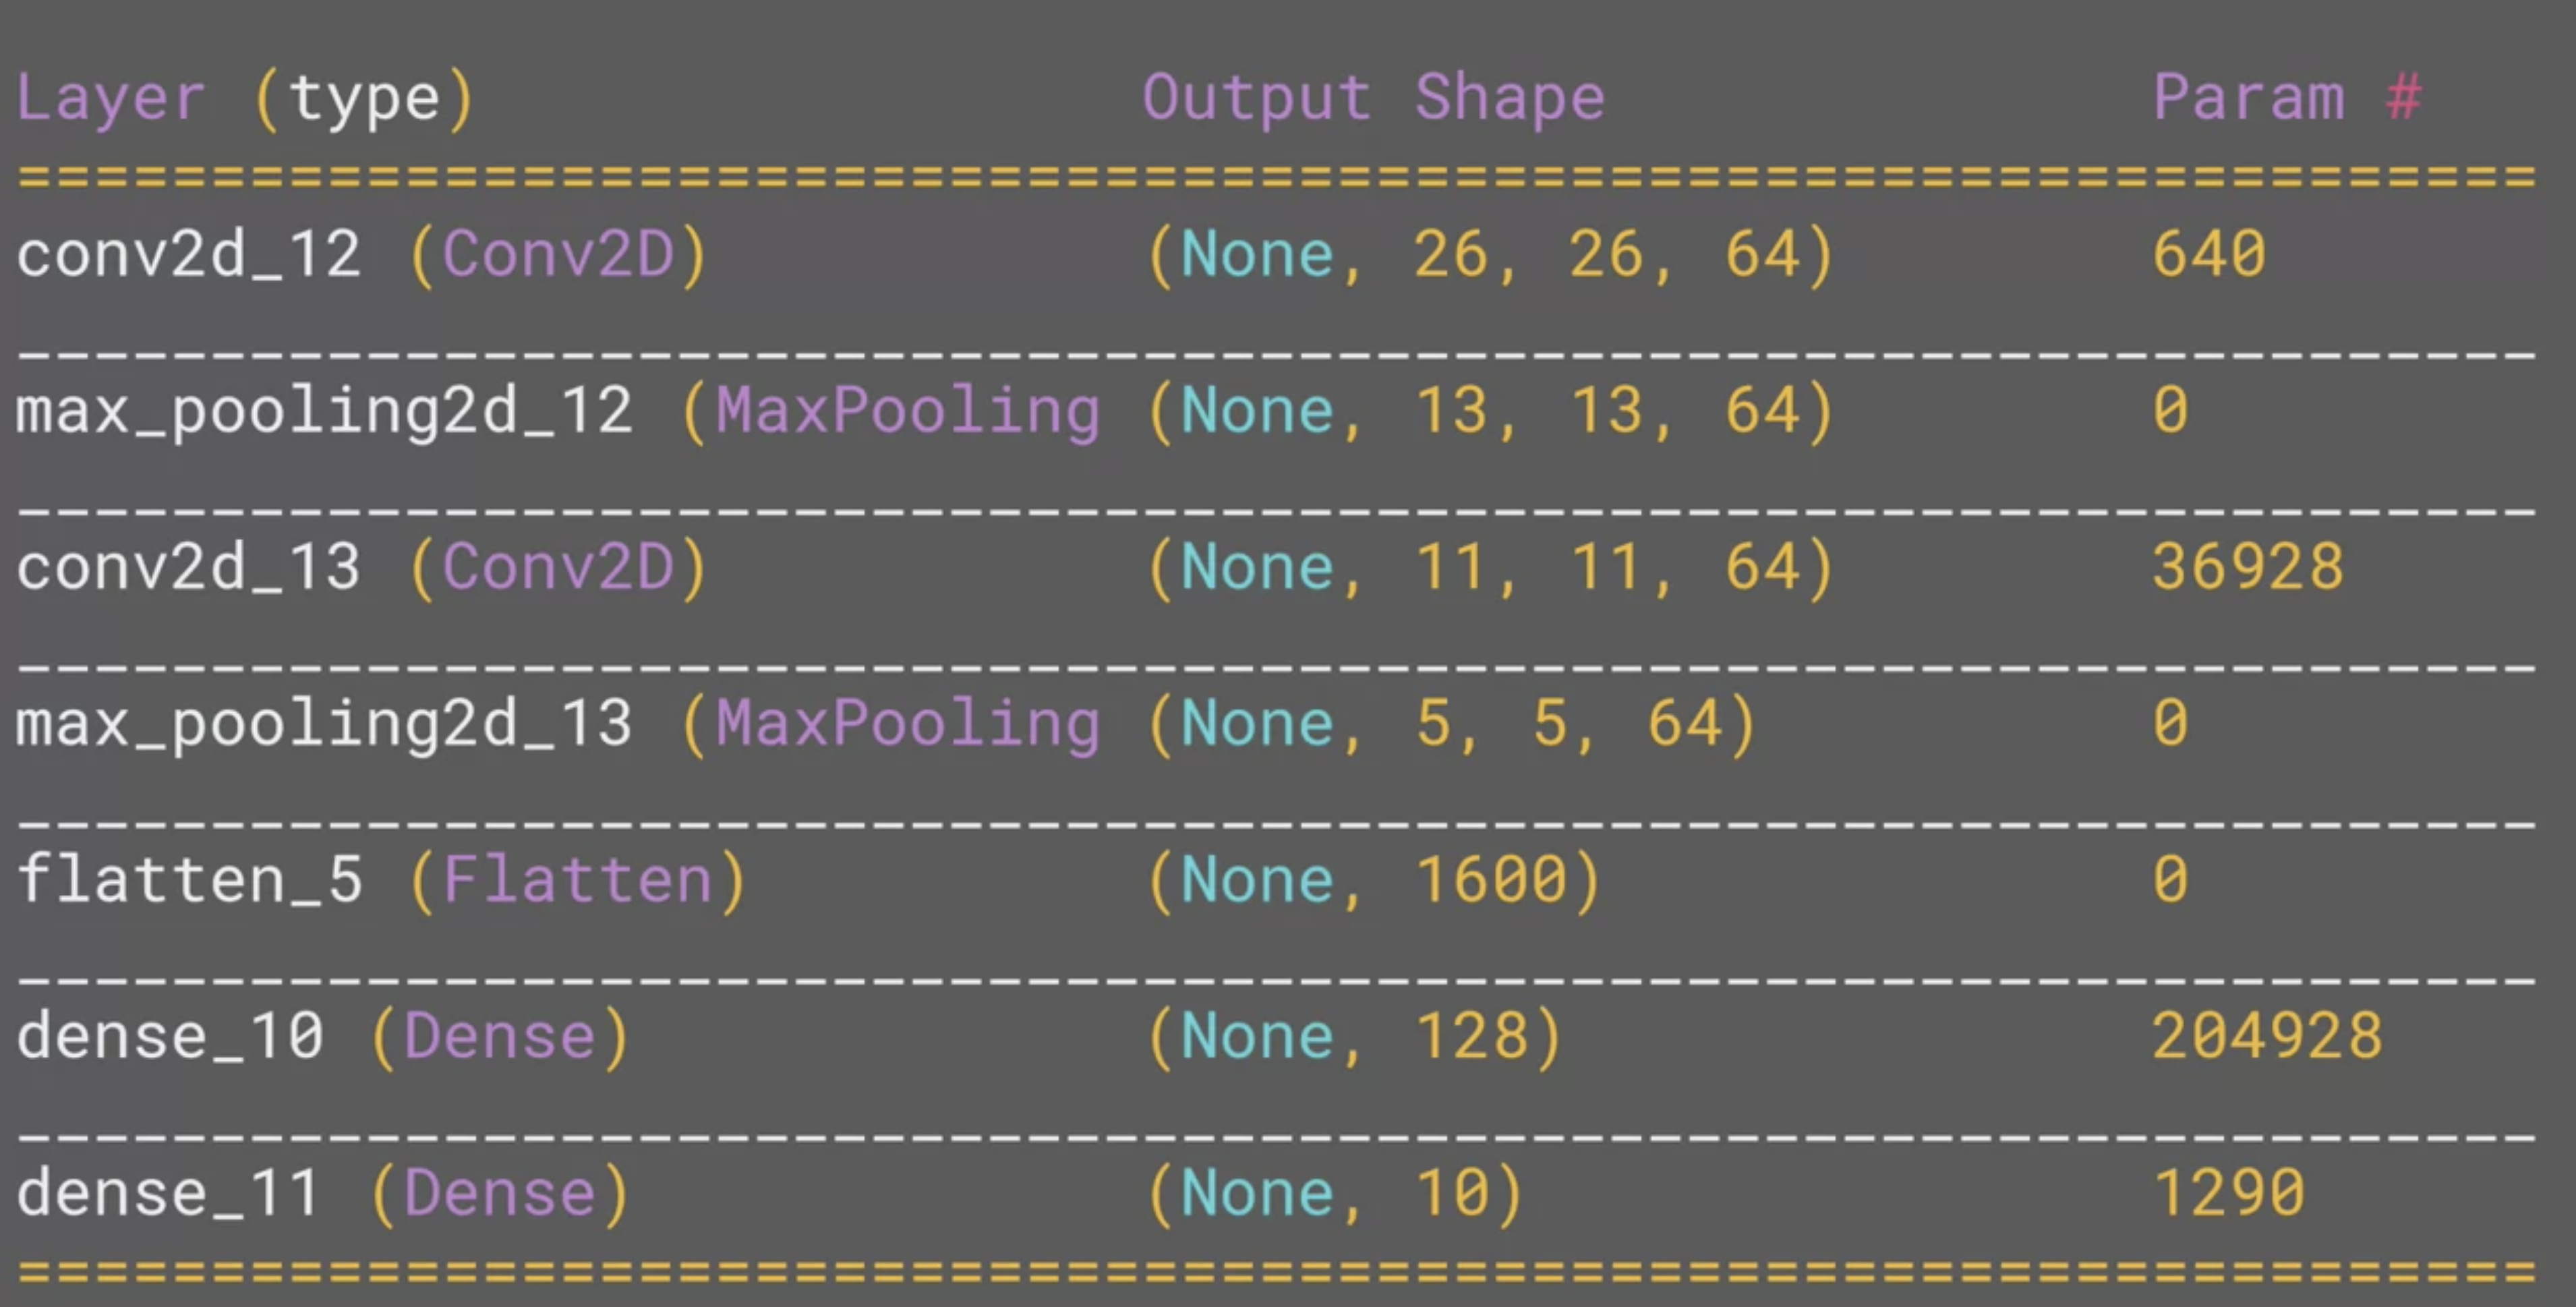

In [3]:
Image('../../image/12.png')

It's a nice table showing us the layers, and some details about them including the output shape. It's important to keep an eye on the output shape column. When you first look at this, it can be a little bit confusing and feel like a bug. After all, isn't the data 28 by 28, so y is the output, 26 by 26. The key to this is remembering that the filter is a three by three filter.

his when you think about it, means that you can't use a one pixel margin all around the image, so the output of the convolution will be two pixels smaller on x, and two pixels smaller on y. If your filter is five-by-five for similar reasons, your output will be four smaller on x, and four smaller on y. So, that's y with a three by three filter, our output from the 28 by 28 image, is now 26 by 26, we've removed that one pixel on x and y, and each of the borders. So, next is the first of the max-pooling layers.